In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bioinfokit.analys import stat
import pingouin as pg
dane = pd.read_excel("C:/Users/wikto/Downloads/Macierze_Twardości (2).xlsx")
pom = dane.drop(0)
p = pom["Lany"].tolist()
a= pom["Kuty"].tolist()
b = pom["Lany.1"].tolist()
c = pom["Kuty.1"].tolist()
r = np.concatenate([p,b])
r1 = np.concatenate([a,c])
pom2 = pd.DataFrame({"twardość":r})
pom3 = pd.DataFrame({"twardość":r1})
p = ["Lany" for x in range(0,49)]
a = ["Kuty" for x in range(0,49)]
b = ["Lany" for x in range(0,49)]
c = ["Kuty" for x in range(0,49)]
r = np.concatenate([p,b])
r1 = np.concatenate([a,c])
pom2["stan"] = r
pom3["stan"] = r1
p = [0.8 for x in range(0,49)]
a = [1.2 for x in range(0,49)]
b = [0.8 for x in range(0,49)]
c = [1.2 for x in range(0,49)]
r = np.concatenate([p,a])
r1 = np.concatenate([b,c])
pom2["Zawartość węgla"] = r
pom3["Zawartość węgla"] = r1
pom

,Lany,Kuty,Lany.1,Kuty.1
1,343,434,374,670
2,298,401,475,673
3,336,450,456,654
4,337,343,422,685
5,392,440,488,682
6,335,433,437,648
7,353,403,429,664
8,341,427,446,685
9,346,401,419,692
10,340,417,433,660


[]

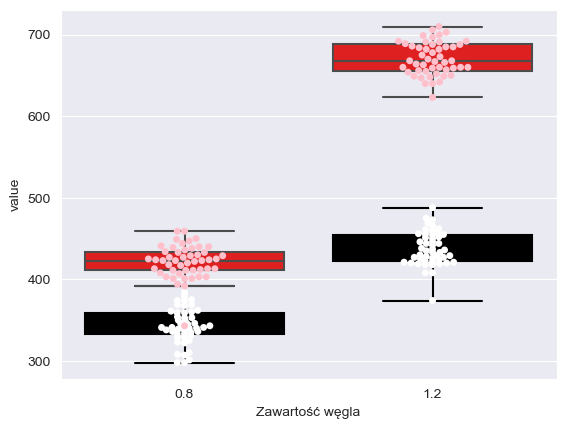

In [2]:
df_melt = pd.melt(pom2.reset_index(),id_vars=["Zawartość węgla"],value_vars=["twardość"])
df_melt2 = pd.melt(pom3.reset_index(),id_vars=["Zawartość węgla"],value_vars=["twardość"])
ax = sns.boxplot(x='Zawartość węgla', y='value', data=df_melt, color='black')
ax = sns.swarmplot(x="Zawartość węgla", y="value", data=df_melt, color='white')
ax = sns.boxplot(x='Zawartość węgla', y='value', data=df_melt2, color='red')
ax = sns.swarmplot(x="Zawartość węgla", y="value", data=df_melt2, color='pink')
plt.plot()

In [3]:
df_melt.columns = ['Carbon','index', 'value']
res = stat()
res.anova_stat(df=df_melt,res_var="value",anova_model='value ~ C(Carbon)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Carbon),1.0,217423.020408,217423.020408,466.333463,1.255235e-38
Residual,96.0,44758.979592,466.239371,NaN,NaN


In [4]:
df_melt2.columns = ['Carbon','index', 'value']
res = stat()
res.anova_stat(df=df_melt2,res_var="value",anova_model='value ~ C(Carbon)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Carbon),1.0,1.517282e+06,1.517282e+06,3750.517351,9.567934e-79
Residual,96.0,3.883706e+04,4.045527e+02,NaN,NaN


In [5]:
g1 = pom["Lany"].tolist()
g2 = pom["Kuty"].tolist()
g3 = pom["Lany.1"].tolist()
g4 = pom["Kuty.1"].tolist()
t,p = st.levene(g1,g2,g3,g4)
print(f"{p=}")
if p < 0.05:
    print("Wariancje są zdecydowanie różne")
else:
    print("Wariancje nie są zdecydowanie różne")

p=0.7700852261263589
Wariancje nie są zdecydowanie różne


Test spełnia podane założenia, wraz ze wzrostem zawartości węgla rośnie twardość, a wraz ze zmianą stanu z lanego na kuty twardość wyraźnie się zwiększa

In [6]:
t,p = st.shapiro(g1)
print(f"grupa 1: {p=}")
if p>0.05:
    print("Grupa 1 spełnia rozkład normalny")
else:
    print("Grupa 1 nie spełnia rozkładu normalnego")
print("")
t,p = st.shapiro(g2)
print(f"grupa 2: {p=}")
if p>0.05:
    print("Grupa 2 spełnia rozkład normalny")
else:
    print("Grupa 2 nie spełnia rozkładu normalnego")
print("")
t,p = st.shapiro(g3)
print(f"grupa 3: {p=}")
if p>0.05:
    print("Grupa 3 spełnia rozkład normalny")
else:
    print("Grupa 3 nie spełnia rozkładu normalnego")

print("")
t,p = st.shapiro(g4)
print(f"grupa 4: {p=}")
if p>0.05:
    print("Grupa 4 spełnia rozkład normalny")
else:
    print("Grupa 4 nie spełnia rozkładu normalnego")


grupa 1: p=0.5398104190826416
Grupa 1 spełnia rozkład normalny

grupa 2: p=0.007406128104776144
Grupa 2 nie spełnia rozkładu normalnego

grupa 3: p=0.2012287825345993
Grupa 3 spełnia rozkład normalny

grupa 4: p=0.3735889792442322
Grupa 4 spełnia rozkład normalny


In [7]:
    g1 = pom["Lany"].tolist()
    g2 = pom["Kuty"].tolist()
    g3 = pom["Lany.1"].tolist()
    g4 = pom["Kuty.1"].tolist()

    # Przeprowadzony test post-hoc TUKEY'A:
    df = pd.DataFrame({'value': g1 + g2 + g3 + g4,'group': ['g1'] * len(g1) + ['g2'] * len(g2) + ['g3'] * len(g3) + ['g4'] * len(g4)})
    tukey = pg.pairwise_tests(data=df, dv='value', between='group', alpha=0.05, padjust='bonf')
    print("TEST POST-HOC - Test TUKEY'A:\n",tukey.to_string(),"\n")

    alfa = 0.05 # poziom istotności
    p_values = list(tukey['p-corr'])    # p-value po korekcie wielokrotnej próby

    lista_polaczona = []
    for i in range(len(p_values)):
        lista_polaczona.append(tukey['A'][0] + " " + tukey['B'][0])

    j = 0
    for i in p_values:
        if i < alfa:
            print("Istnieją istotne statystycznie różnice między grupami {}".format(lista_polaczona[j]))
        else:
            print("Nie istnieją istotne statystycznie różnice między grupami {}".format(lista_polaczona[j]))
        j = j + 1

TEST POST-HOC - Test TUKEY'A:
   Contrast   A   B  Paired  Parametric          T   dof alternative         p-unc        p-corr p-adjust       BF10     hedges
0    group  g1  g2   False        True -18.278945  96.0   two-sided  5.011622e-33  3.006973e-32     bonf  3.185e+29  -3.663978
1    group  g1  g3   False        True -21.594755  96.0   two-sided  1.255235e-38  7.531412e-38     bonf  1.017e+35  -4.328626
2    group  g1  g4   False        True -76.141620  96.0   two-sided  1.213679e-87  7.282073e-87     bonf  2.568e+83 -15.262437
3    group  g2  g3   False        True  -3.874811  96.0   two-sided  1.950545e-04  1.170327e-03     bonf    122.516  -0.776698
4    group  g2  g4   False        True -61.241468  96.0   two-sided  9.567934e-79  5.740760e-78     bonf  4.082e+74 -12.275731
5    group  g3  g4   False        True -56.064333  96.0   two-sided  3.664516e-75  2.198710e-74     bonf  1.169e+71 -11.237985 

Istnieją istotne statystycznie różnice między grupami g1 g2
Istnieją istotne s

In [8]:
p = pd.DataFrame({"Lany":[0.8,pom["Lany"].mean()]})
p["Kuty"] = [0.8,pom["Kuty"].mean()]
p["Lany_2"] = [1.2,pom["Lany.1"].mean()]
p["Kuty_2"] = [1.2,pom["Kuty.1"].mean()]
p.index=["stop:","średnia twr."]
p

,Lany,Kuty,Lany_2,Kuty_2
stop:,0.800000,0.800000,1.200000,1.200000
średnia twr.,343.612245,421.795918,437.816327,670.653061
